# Task-02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.



In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df= pd.read_csv("Titanic_Dataset.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
count,891.000000,878.000000,891.000000,714.000000,889.000000,891.000000
mean,446.000000,0.384966,2.308642,29.699118,0.524184,32.144612
std,257.353842,0.486865,0.836071,14.526497,1.103705,49.700181
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived        13
Pclass           0
Name             1
Sex              7
Age            177
SibSp            2
Parch            2
Ticket           1
Fare             0
Cabin          688
Embarked         9
dtype: int64

# Cleaning of data
### 1: Filling NULL Cells

In [6]:
# Cleaning of data 
# Removing or Filling NULL Cells
print(df["Survived"].mode() )                                     # mode is 0   
df["Survived"].fillna(0, inplace=True)                            # removing  null values 

print(df["Sex"].mode() )                                          # mode is "male"   
df["Sex"].fillna("male", inplace=True)           # removing null values with mode (mode=male)

0    0.0
Name: Survived, dtype: float64
0    male
Name: Sex, dtype: object


C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\2103008206.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Survived"].fillna(0, inplace=True)                            # removing  null values
C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\2103008206.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

<function matplotlib.pyplot.show(close=None, block=None)>

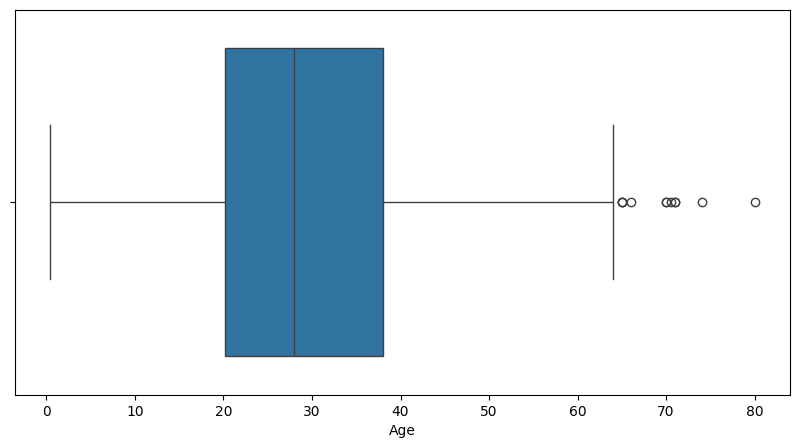

In [7]:
#The 'Age' column has 177 null values. We can fill it using the mean, but it has outliers. 
# First, we need to handle the outliers.
plt.figure(figsize=(10,5))
sns.boxplot(x="Age", data=df)
plt.show


In [8]:
# Removing Outliers from Age column
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR=Q3-Q1
lower_range= Q1 - 1.5*IQR
upper_range= Q3 + 1.5*IQR

print(lower_range,upper_range)

new_df=df[df["Age"]<=upper_range]    #Outliers removing from Age column

-6.6875 64.8125


In [9]:
new_df["Name"].fillna("Mr Abc", inplace=True)

C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\3877212253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Name"].fillna("Mr Abc", inplace=True)
C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\3877212253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Name"].fillna("Mr Abc", inplace=True)


In [10]:

new_df["Parch"].mode()      # mode of Parch (parent or children of some one) is 0
new_df["Parch"].fillna(0, inplace=True) 

new_df["SibSp"].fillna(new_df["SibSp"].median(), inplace=True)   #Sibsp (Sibling or spouse)has only on null so it can be fill with median

C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\2347425745.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Parch"].fillna(0, inplace=True)
C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\2347425745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Parch"].fillna(0, inplace=True)
C:\Users\M YOUSAF\AppData\Local\Tem

In [11]:
print(new_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          524
Embarked         7
dtype: int64


In [12]:
# Embarked is categorical data so we can fill null values  it with Mode 
new_df["Embarked"].mode()
new_df["Embarked"].fillna("S", inplace=True)


C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\2731671360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Embarked"].fillna("S", inplace=True)
C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\2731671360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Embarked"].fillna("S", inplace=True)


In [13]:
new_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          524
Embarked         0
dtype: int64

## Now, we can try to extract patterns using different methods.

In [14]:
# First  extract survivors based on Passenger class 
new_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C


In [15]:
survived_P=[]
survived_P= new_df[ new_df["Survived"] ==1.0]  
# extract number of suvived passenger wrt passenger class (like 1st ,2nd, 3rd class)
survived_Class_df=survived_P[["Survived", "Pclass"]]          
survived_Class_df                                     


# Count the frequency of each class in the Pclass column
class_counts = survived_Class_df["Pclass"].value_counts()

# Get the frequency of 1st class
first_class_count = class_counts.get(1, 0)
second_class_count = class_counts.get(2, 1)
third_class_count = class_counts.get(3, 2)


print("Number of 1st class survivors:", first_class_count)
print("Number of 2nd class survivors:", second_class_count)
print("Number of 3rd class survivors:", third_class_count)


Number of 1st class survivors: 121
Number of 2nd class survivors: 82
Number of 3rd class survivors: 84


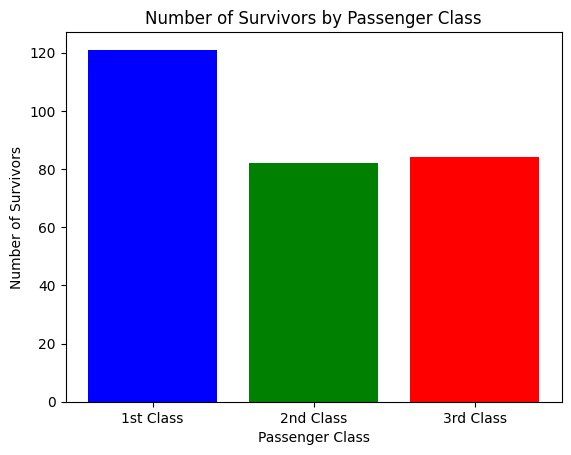

In [16]:
import matplotlib.pyplot as plt

# Data for plotting
classes = ['1st Class', '2nd Class', '3rd Class']
counts = [first_class_count, second_class_count, third_class_count]

# Create a bar plot

plt.bar(classes, counts, color=['blue', 'green', 'red'])

plt.title('Number of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()


In [17]:
#Now we should try to extract the survival rate based on gender
new_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S


In [24]:
Survived_gender=[]
Survived_gender= new_df[df["Survived"]==1.0]
Survived_gender_df= Survived_gender[["Survived", "Sex"]]
Survived_gender_df                                          # Selecting two columns Suvived and Sex    

gen_counts = Survived_gender_df["Sex"].value_counts()
gen_counts

#Counting the males who survived
male_count=gen_counts.get("male")                    
#Counting the females who survived
female_count=gen_counts.get("female")

male_count , female_count

C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\4104152892.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Survived_gender= new_df[df["Survived"]==1.0]


(95, 192)

<function matplotlib.pyplot.show(close=None, block=None)>

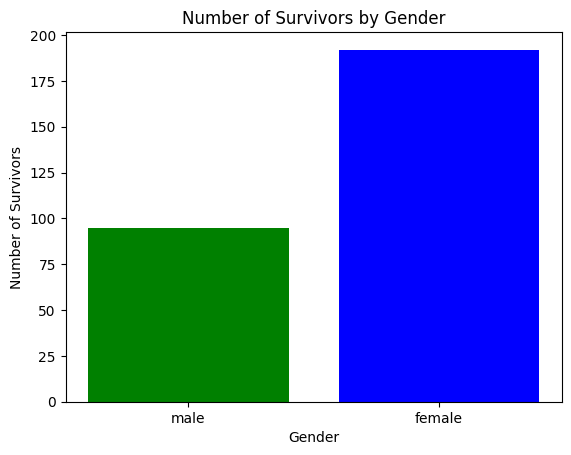

In [26]:
classes= ["male", "female"]
counts= [male_count, female_count]

plt.bar(classes, counts, color=["green", "blue"])
plt.title("Number of Survivors by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.show

C:\Users\M YOUSAF\AppData\Local\Temp\ipykernel_6560\3025540471.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Survived_according_Age= new_df[df["Survived"]==1.0]


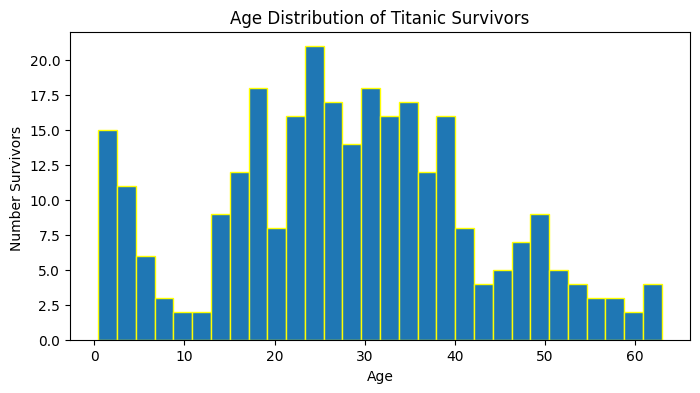

In [65]:
# extracting age distribution who survived 
Survived_according_Age=[]
Survived_according_Age= new_df[df["Survived"]==1.0]
Survived_according_Age_df= Survived_according_Age[["Survived", "Age"]]
Survived_according_Age_df                                 # Selecting two columns Survived and Age    


# Plot the distribution of ages (titanic survivors)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(Survived_according_Age_df["Age"], bins=30, edgecolor='yellow')  
plt.title('Age Distribution of Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Number Survivors ')
plt.show()